In [2]:
import os
os.chdir(os.getcwd()[:-6])

In [15]:
from float.data import DataLoader
from float.prediction.skmultiflow import SkmultiflowClassifier
from float.prediction.evaluation import PredictionEvaluator
from float.pipeline import PrequentialPipeline
from skmultiflow.trees import HoeffdingTreeClassifier
from skmultiflow.neural_networks.perceptron import PerceptronMask
from sklearn.metrics import zero_one_loss
from float.visualization import plot, spider_chart
from float.prediction.evaluation.measures import noise_variability, mean_drift_performance_deterioration
import matplotlib.pyplot as plt

In [8]:
data_loader = DataLoader(None, f'float/data/datasets/spambase.csv', target_col=0)

known_drifts = [round(data_loader.stream.n_samples * 0.2), round(data_loader.stream.n_samples * 0.4),
                round(data_loader.stream.n_samples * 0.6), round(data_loader.stream.n_samples * 0.8)]

predictors = [SkmultiflowClassifier(HoeffdingTreeClassifier(), data_loader.stream.target_values, reset_after_drift=True),
              SkmultiflowClassifier(PerceptronMask(), data_loader.stream.target_values, reset_after_drift=True)]
pred_evaluators = [PredictionEvaluator([zero_one_loss, noise_variability, mean_drift_performance_deterioration],
                                       decay_rate=0.1, window_size=10, known_drifts=known_drifts, batch_size=10) 
                   for i in range(2)]

for i in range(2):
    prequential_pipeline = prequential_pipeline = PrequentialPipeline(data_loader=data_loader,
                                                                  predictor=predictors[i],
                                                                  prediction_evaluator=pred_evaluators[i],
                                                                  max_n_samples=data_loader.stream.n_samples)
    prequential_pipeline.run()

Pretrain predictor with 100 observation(s).
[====================] 100%
################################## SUMMARY ##################################
Evaluation finished after 21.81770086288452s
Data Set float/data/datasets/spambase.csv
Processed 4601 instances in batches of 100
----------------------
Prediction:
| Model                 |   Avg. Test Time |   Avg. Train Time | Avg. zero_one_loss                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

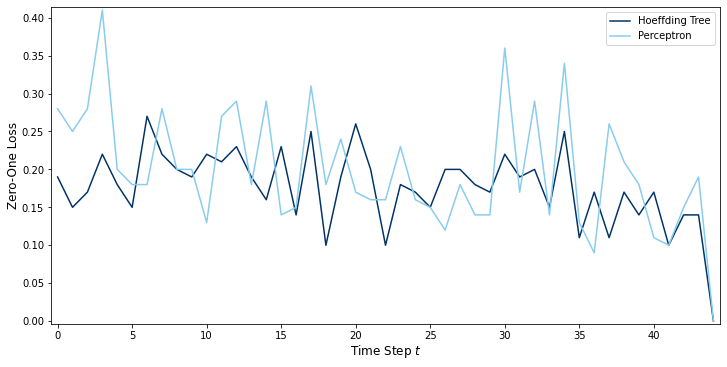

In [11]:
plot(measures=[pred_evaluators[0].result['zero_one_loss']['measures'], pred_evaluators[1].result['zero_one_loss']['measures']],
     labels=['Hoeffding Tree', 'Perceptron'],
     measure_name='Zero-One Loss',
     measure_type='prediction',
     smooth_curve=False)
plt.show()

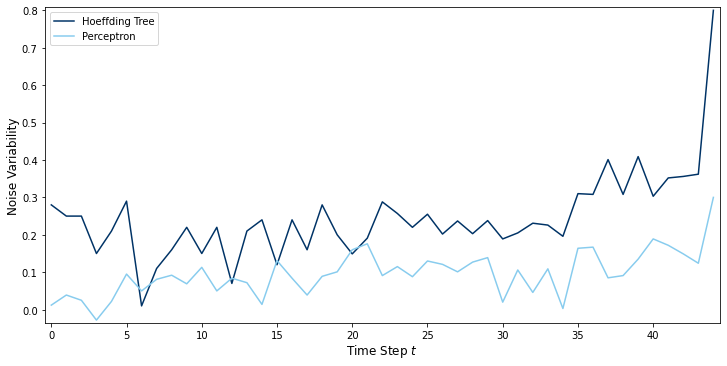

In [12]:
plot(measures=[pred_evaluators[0].result['noise_variability']['measures'], pred_evaluators[1].result['noise_variability']['measures']],
     labels=['Hoeffding Tree', 'Perceptron'],
     measure_name='Noise Variability',
     measure_type='prediction',
     smooth_curve=False)
plt.show()

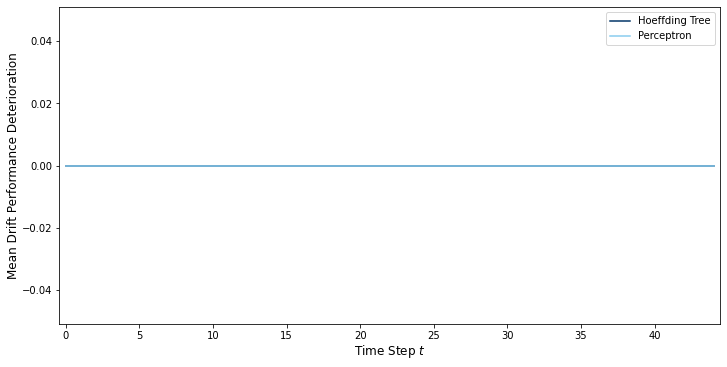

In [13]:
plot(measures=[pred_evaluators[0].result['mean_drift_performance_deterioration']['measures'], pred_evaluators[1].result['mean_drift_performance_deterioration']['measures']],
     labels=['Hoeffding Tree', 'Perceptron'],
     measure_name='Mean Drift Performance Deterioration',
     measure_type='prediction',
     smooth_curve=False)
plt.show()

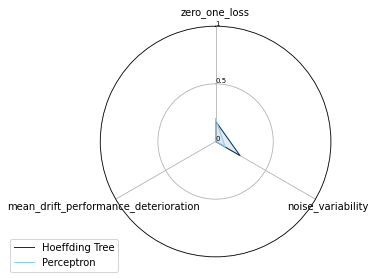

In [17]:
spider_chart(measures=[[pred_evaluators[0].result['zero_one_loss']['mean'][-1], pred_evaluators[0].result['noise_variability']['mean'][-1],
                        pred_evaluators[0].result['mean_drift_performance_deterioration']['mean'][-1]],
                       [pred_evaluators[1].result['zero_one_loss']['mean'][-1], pred_evaluators[1].result['noise_variability']['mean'][-1],
                        pred_evaluators[1].result['mean_drift_performance_deterioration']['mean'][-1]]
                       ],
             labels=['Hoeffding Tree', 'Perceptron'],
             measure_names=['zero_one_loss', 'noise_variability', 'mean_drift_performance_deterioration'])
plt.show()
